Note: you may need to restart the kernel to use updated packages.


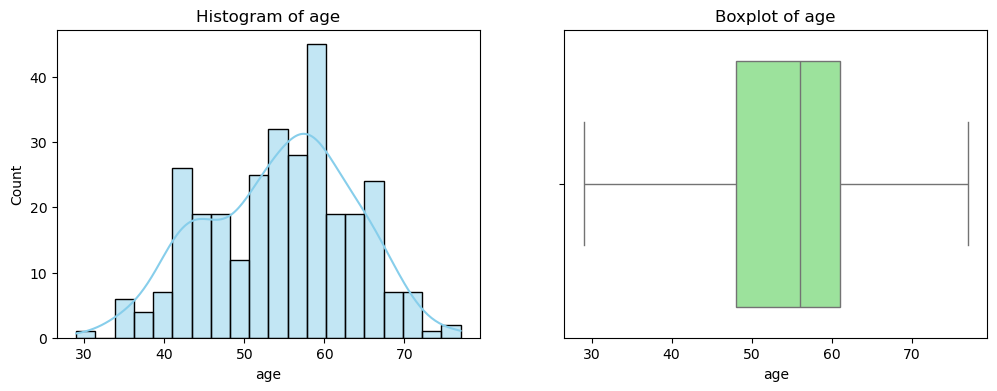

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



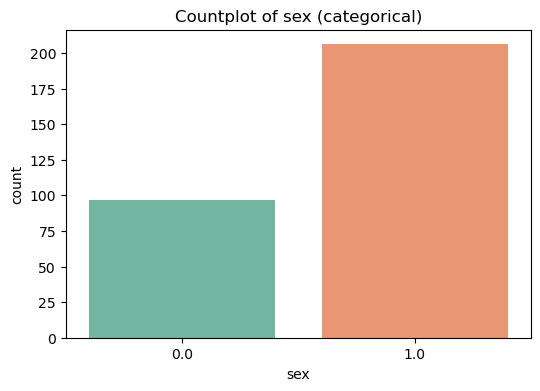

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



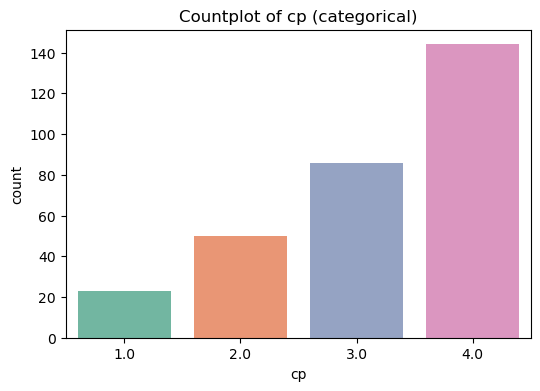

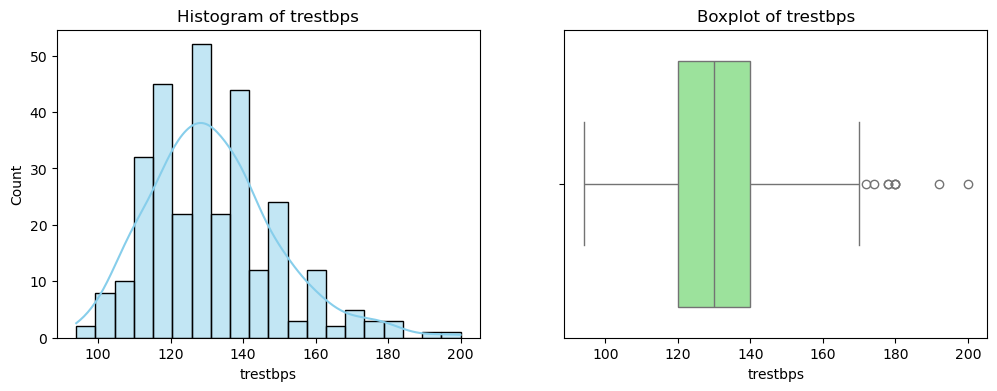

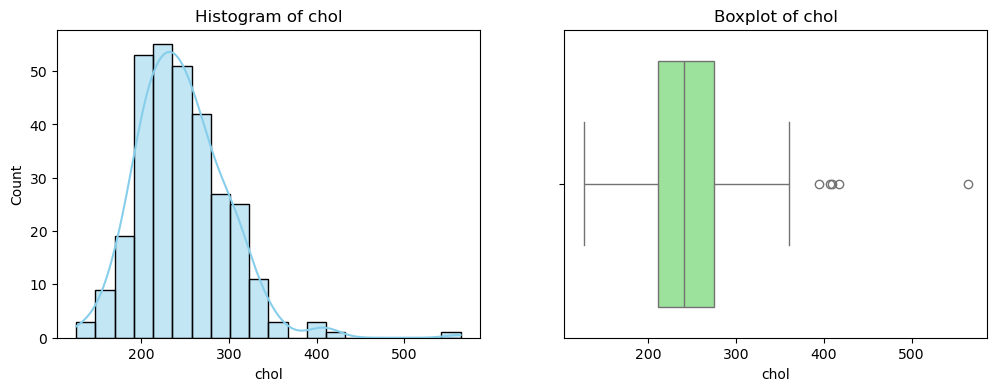

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



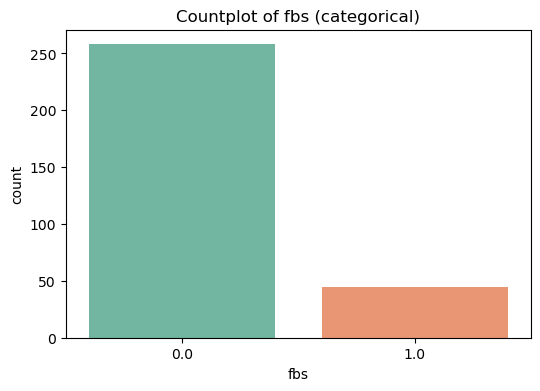

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



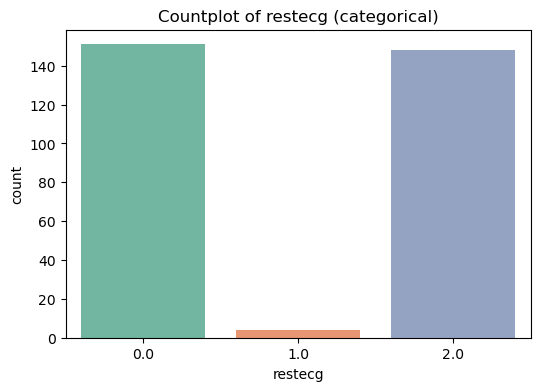

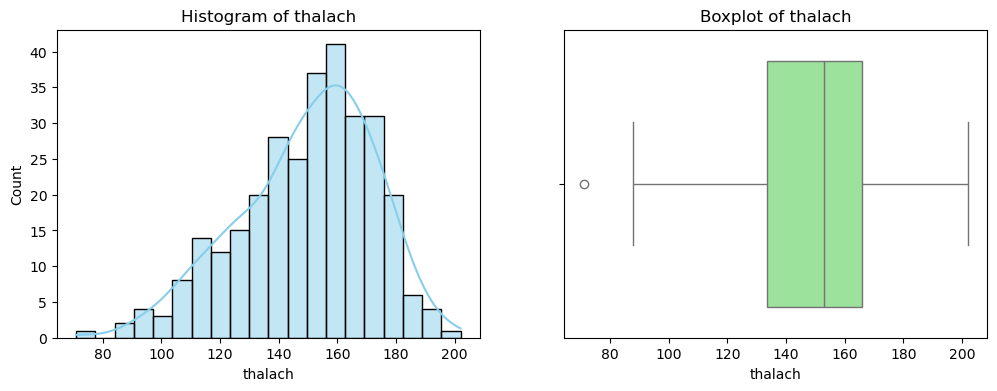

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



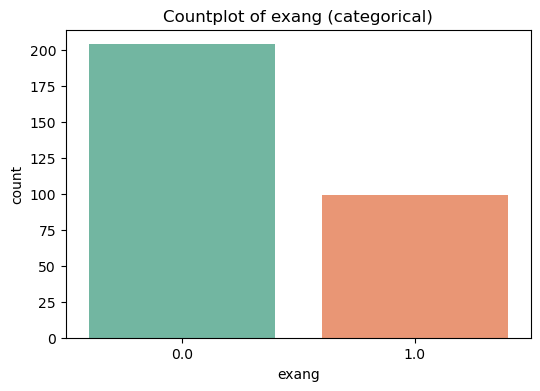

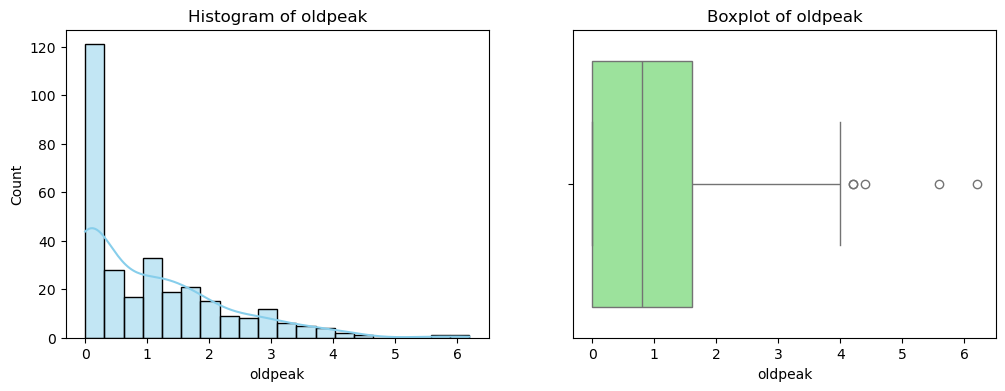

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



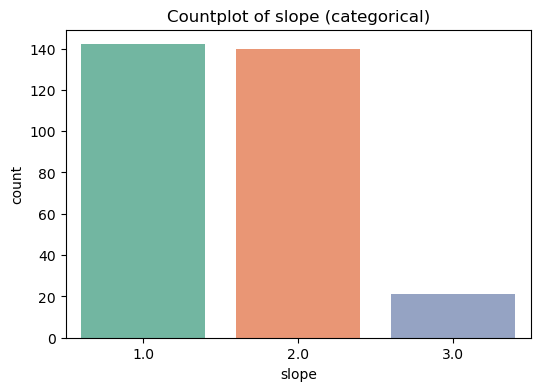

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



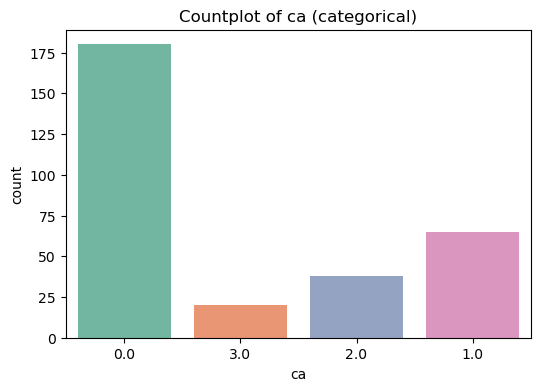

<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



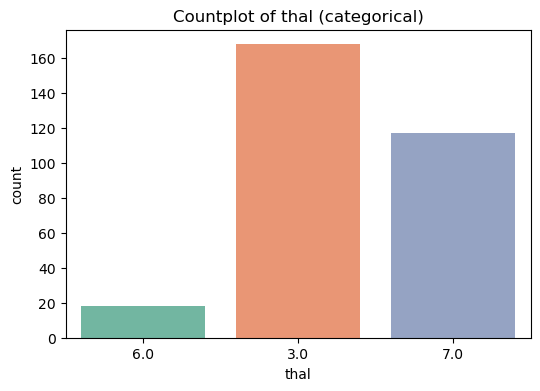

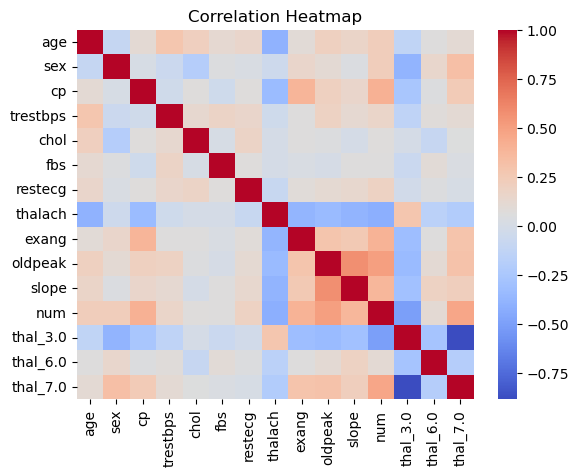

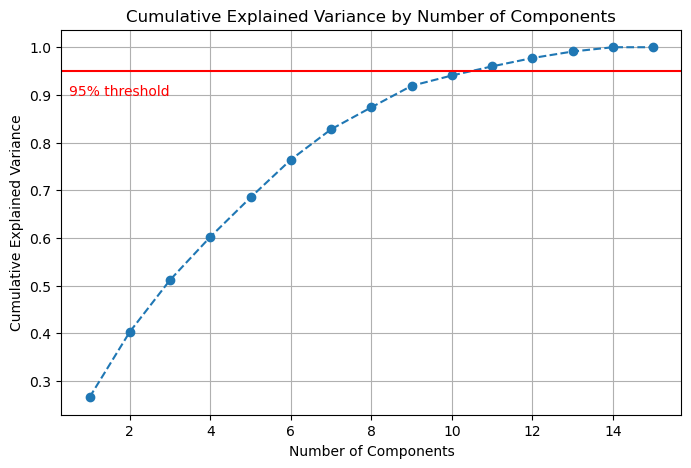

Original data shape: (303, 15)
Data shape after PCA: (303, 10)


<string>:7: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 2


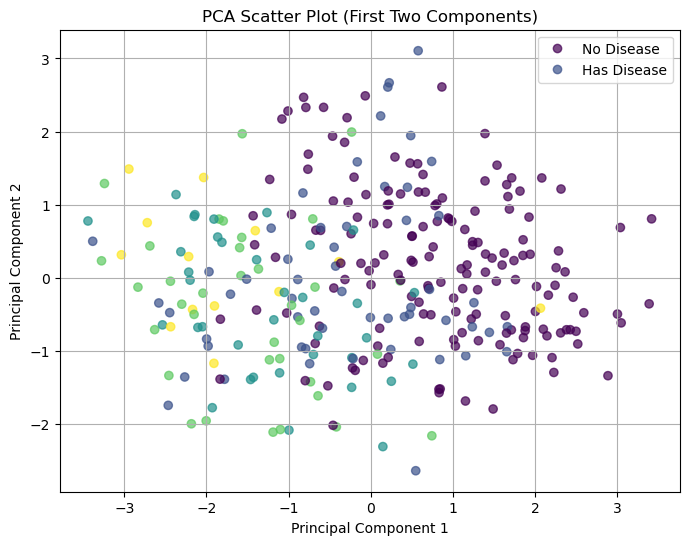

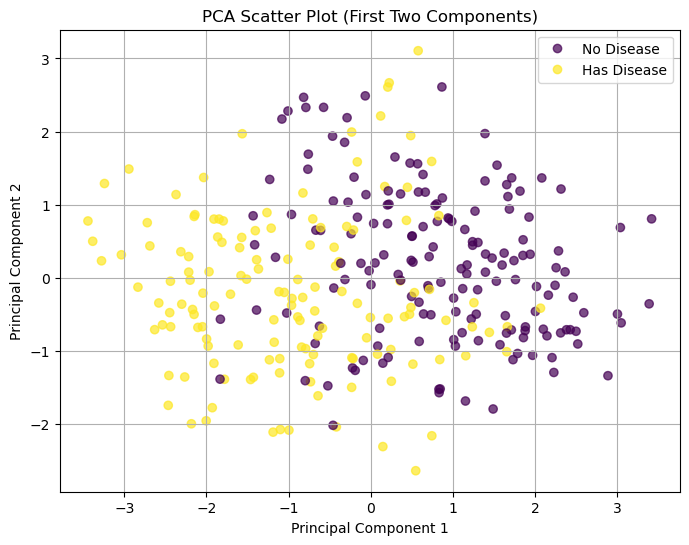

Original PCA shape: (303, 10)
Training PCA shape: (242, 10)
Testing PCA shape: (61, 10)
Logistic Regression Model :

Accuracy on PCA data: 90.16%
Accuracy on RF features: 83.61%
Accuracy on RFE features: 90.16%
Support Vector Machine Model:

SVM Accuracy on PCA data: 88.52%
SVM Accuracy on RF features: 90.16%
SVM Accuracy on RFE features: 88.52%
Decision Tree Classifier Model:

Decision Tree Accuracy on PCA data: 70.49%
Decision Tree Accuracy on RF features: 75.41%
Decision Tree Accuracy on RFE features: 78.69%
Random Forest Classifier Model:

Random Forest Accuracy on PCA data: 88.52%
Random Forest Accuracy on RF features: 83.61%
Random Forest Accuracy on RFE features: 88.52%
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.9

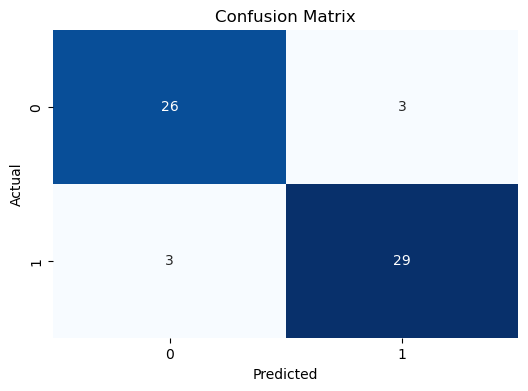

AUC Score: 0.9278
Accuracy on PCA data: 90.16%
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



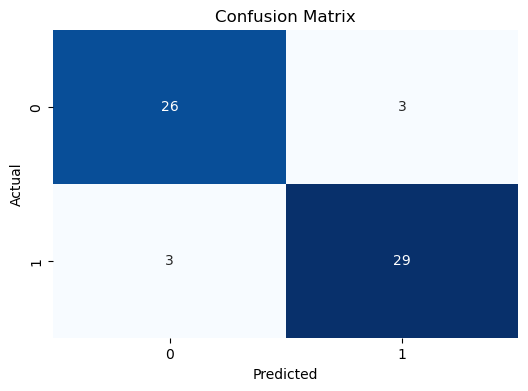

AUC Score: 0.9316
Accuracy on RFE data: 90.16%
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



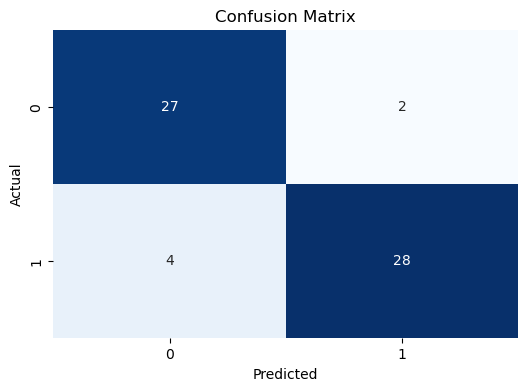

AUC Score: 0.9483
SVM Accuracy on RF features: 90.16%


In [1]:
import import_ipynb
import supervised_learning

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
import pandas as pd 
import seaborn as sns

c:\Users\rm241\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rm241\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rm241\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rm241\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

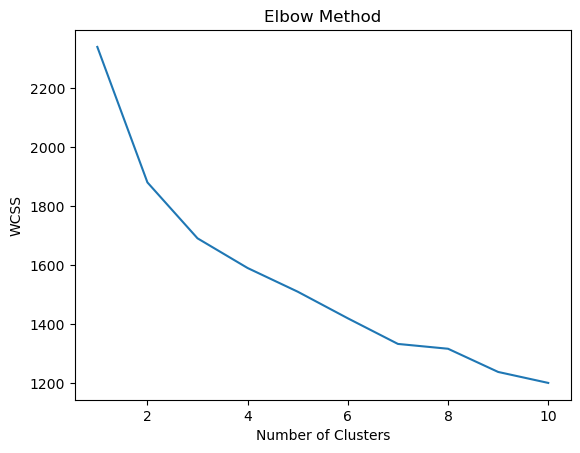

In [ ]:
x_pca = supervised_learning.x_pca
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

c:\Users\rm241\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


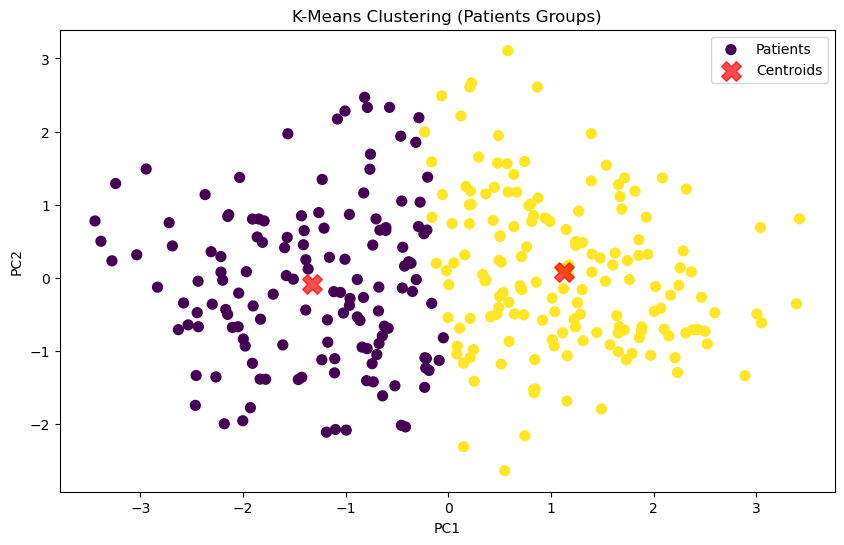

In [9]:
kmeans_final = KMeans(n_clusters=2 , init='k-means++' , random_state=42)
y_kmeans = kmeans_final.fit_predict(x_pca)
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Patients')
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroids')

plt.title('K-Means Clustering (Patients Groups)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

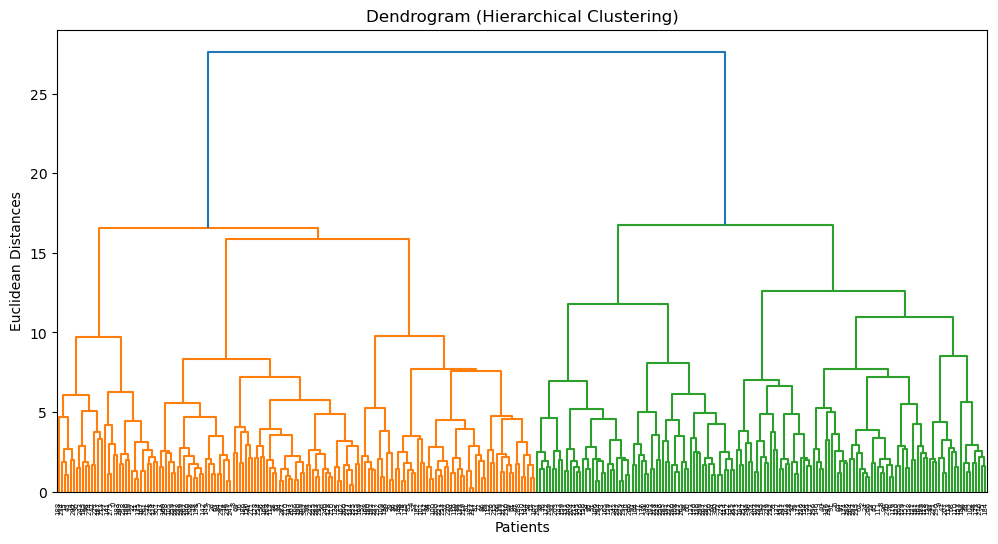

In [11]:
plt.figure(figsize=(12,6))
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Patients')
plt.ylabel('Euclidean Distances')

dendrogram = sch.dendrogram(sch.linkage(x_pca, method='ward'))
plt.show()

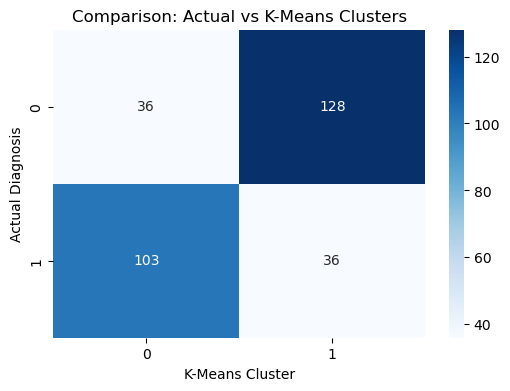

In [14]:
y = supervised_learning.y

comparison_df = pd.DataFrame({
    'Actual Diagnosis': y, 
    'K-Means Cluster': y_kmeans
})
ct = pd.crosstab(comparison_df['Actual Diagnosis'], comparison_df['K-Means Cluster'])

plt.figure(figsize=(6, 4))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Comparison: Actual vs K-Means Clusters')
plt.show()